<a href="https://colab.research.google.com/github/ming80302/SOARS/blob/main/rd_csv_soar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

read csv file and plot time series dataFrame

In [ ]:
import numpy
import pandas as pd
import datetime

### 1 Read and plot PRISM dataset

read  /content/drive/MyDrive/data/SOARS/prec_prism_ca.txt


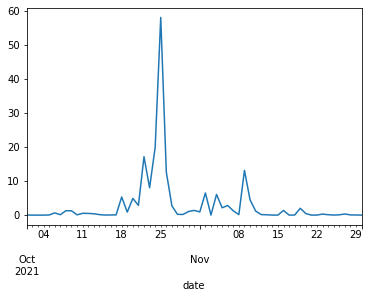

In [ ]:
dir_i = '/content/drive/MyDrive/data/SOARS/'
flnm = dir_i + 'prec_prism_ca.txt'
print('read ', flnm)
 
df_prism = pd.read_csv(flnm, header = None, delim_whitespace=True)

# add column names and index
df_prism.columns = ['date','prec']
df_prism.index = df_prism.date

# convert date index to DateTime index for the plot of x-axis 
df_prism.index = pd.to_datetime(df_prism.index, format='%Y%m%d')
df_prism.prec.plot()

### 2 Read and plot 50-ECMWF precipitation

read  /content/drive/MyDrive/data/SOARS/prec_ecmwf_ca.txt


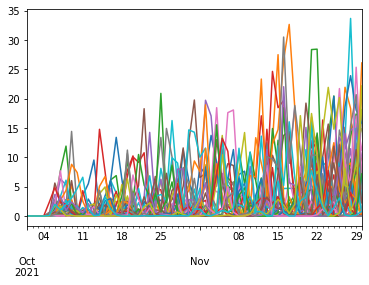

In [ ]:
flnm = dir_i + 'prec_ecmwf_ca.txt'
print('read ', flnm)
 
df = pd.read_csv(flnm, header = None, delim_whitespace=True)

# create column names for dateFrame
list = ['year','month', 'day']
for nm in range(1,51):
  mem = 'mem' + '%02d'%nm
  list.append(mem)

df.columns = list

# create index
n_date = len(df)
 
date_s = datetime.datetime(df.year[0], df.month[0], df.day[0],   0)
date_e = datetime.datetime(df.year[n_date-1], df.month[n_date-1], df.day[n_date-1], 23)
 
date_ind=pd.date_range(date_s, date_e, freq='d')
df.index = date_ind 

data = df.iloc[:,3:]
data.plot(legend=False)
 

### 3 plot precipitation of specific member and overlay PRISM dataset

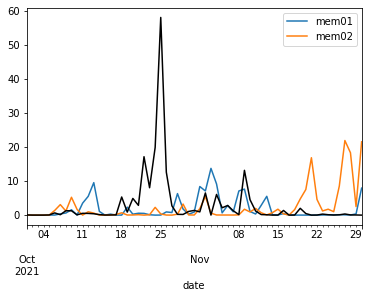

In [ ]:
# (1) to plot specific member
# (2) overlay PRISM
data = df.iloc[:,3:5]
data.plot()
df_prism.prec.plot(color='black')